# Actividad

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Preparacion de datos

In [3]:
# Cargar el dataset
df =  pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [14]:
# Renombrar las columnas para facilitar su uso
df.columns = ['N', 'TransactionDate', 'HouseAge', 'DistanceToMRT', 'ConvenienceStores', 'Latitude', 'Longitude', 'HousePrice']
df.head()

,N,TransactionDate,HouseAge,DistanceToMRT,ConvenienceStores,Latitude,Longitude,HousePrice
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


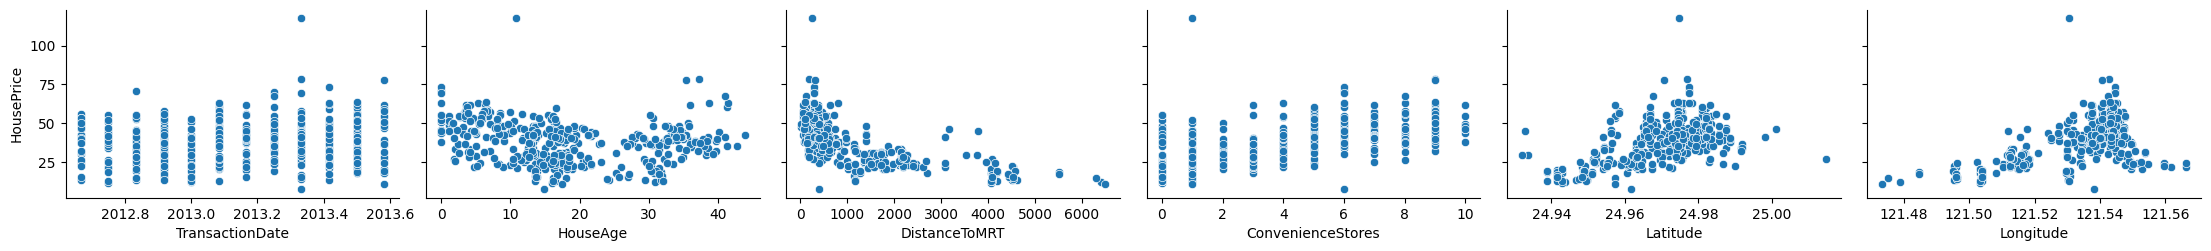

In [15]:
# Visualizacion de datos a traves de seaborn
sns.pairplot(df, x_vars=['TransactionDate', 'HouseAge', 'DistanceToMRT', 'ConvenienceStores', 'Latitude', 'Longitude'], y_vars=['HousePrice'], height=2.5, aspect=1.5)

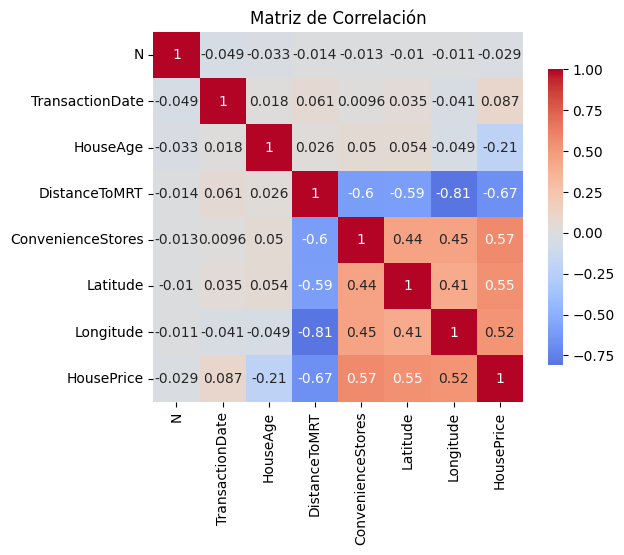

In [61]:
# Matriz de correlacion
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
# Cargar los datos
# RLM: y = B0 + B1*X1 + B2*X2 + ... + Bn*Xn + e
# y: variable dependiente
# x1,... xn: variables independientes
# B0: Intercepto
# B1,... Bn: Coeficientes de regresion
# e: termino de error
x = df[['TransactionDate', 'HouseAge', 'DistanceToMRT', 'ConvenienceStores', 'Latitude', 'Longitude']]
y = df['HousePrice']

### Modelo de una sola variable

In [ ]:
# ConvenienceStores
x_cs = df[['ConvenienceStores']]

## 2. Separacion en conjunto de entrenamiento y prueba

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Dividir los datos en conjuntos de train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Verificar la forma de los conjuntos
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (331, 6)
x_test shape: (83, 6)
y_train shape: (331,)
y_test shape: (83,)


In [77]:
# Modelo de una sola variable
x_train_cs, x_test_cs, y_train_cs, y_test_cs = train_test_split(x_cs, y, test_size=0.2, random_state=42)
print(f"x_train_cs shape: {x_train_cs.shape}")
print(f"x_test_cs shape: {x_test_cs.shape}")

x_train_cs shape: (331, 1)
x_test_cs shape: (83, 1)


## 3. Configuracion del algoritmo

In [19]:
# Regresion Lineal Multiple
from sklearn.linear_model import LinearRegression

In [78]:
# Crear el modelo
# Regresion Lineal Multiple
model = LinearRegression()

In [79]:
# Regresion Lineal Simple
model_cs = LinearRegression()

## 4. Entrenamiento del modelo

In [80]:
# Ajustar el modelo 
# Regresion Lineal Multiple
model.fit(x_train, y_train)

LinearRegression()

In [81]:
# Regresion Lineal Simple
model_cs.fit(x_train_cs, y_train_cs)

LinearRegression()

## 5. Prediccion

In [72]:
# Regresion Lineal Multiple
print("Regresion Lineal Multiple")
y_pred = model.predict(x_test)
print(y_pred)

Regresion Lineal Multiple
[47.88625422 41.16404556 44.27301439 40.19761542 27.51326511 45.10953115
 44.63293274 46.36346234 23.62063133 54.33444894 34.07416461 36.54533193
 37.55154254 23.2794052  35.26614165 34.38327747 43.35633504 45.40740539
 30.07083159 44.09191493  0.73505984 34.99271686 48.22735154 45.48646485
 11.5995282  39.69783664 12.71276251 42.91282893 34.93451401 37.27964515
 13.17842185 40.12708486 35.21883505 27.71588924 46.40090931 31.21941994
 50.90046891 14.07339433 49.05344276 40.0538446  38.24588962 40.63256441
 47.01634759 37.65598977 39.85801839 46.88588156 43.7241343  20.94434531
 47.41546271 45.40608841 48.33783579 48.98845389 42.27403852 42.5841908
 36.04088185 14.95491907 36.61494629 34.88196676 28.33519081 45.91188076
 33.19268817 32.18910095 14.95491907  8.86547927 10.36079881 34.11119212
 28.48186875 46.59826043 32.96743316 31.47635439 45.75168852 38.1732971
 45.83734855 45.10711423 34.85434095 37.43148997 38.12216764 37.54923793
 40.3686992  33.09139633 42

In [73]:
# Regresion Lineal Simple
print("Regresion Lineal Simple")
y_pred_cs = model_cs.predict(x_test_cs)
print(y_pred_cs)

Regresion Lineal Simple
[43.17255966 40.59517001 30.28561139 30.28561139 35.4403907  48.32733897
 40.59517001 40.59517001 27.70822173 50.90472863 35.4403907  35.4403907
 32.86300104 27.70822173 38.01778035 32.86300104 48.32733897 45.74994932
 38.01778035 45.74994932 30.28561139 35.4403907  40.59517001 43.17255966
 27.70822173 30.28561139 27.70822173 30.28561139 40.59517001 38.01778035
 27.70822173 35.4403907  43.17255966 30.28561139 43.17255966 27.70822173
 50.90472863 27.70822173 53.48211828 48.32733897 32.86300104 38.01778035
 53.48211828 32.86300104 40.59517001 45.74994932 48.32733897 27.70822173
 45.74994932 53.48211828 43.17255966 40.59517001 45.74994932 45.74994932
 35.4403907  27.70822173 40.59517001 30.28561139 35.4403907  40.59517001
 35.4403907  32.86300104 27.70822173 27.70822173 30.28561139 35.4403907
 30.28561139 50.90472863 32.86300104 30.28561139 45.74994932 35.4403907
 45.74994932 40.59517001 38.01778035 30.28561139 27.70822173 43.17255966
 45.74994932 32.86300104 38.01

## 6. Evaluacion

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Verificar el modelo
# Regresion Lineal Multiple
print(f'Intercepto: {model.intercept_}')
pd.DataFrame({'Variable': x.columns, 'Coeficiente': model.coef_})

Intercepto: -13044.231917160547


,Variable,Coeficiente
0,TransactionDate,5.440742
1,HouseAge,-0.270791
2,DistanceToMRT,-0.004759
3,ConvenienceStores,1.091425
4,Latitude,229.043054
5,Longitude,-29.492591


In [74]:
# Regresion Lineal Simple
print(f'Intercepto: {model_cs.intercept_}')
pd.DataFrame({'Variable': x_cs.columns, 'Coeficiente': model_cs.coef_})

Intercepto: 27.70822173392014


,Variable,Coeficiente
0,ConvenienceStores,2.57739


In [ ]:
# Regresion Lineal Multiple
print(f'Error Cuadratico Medio: {mean_squared_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

Error Cuadratico Medio: 53.50561912450505
R2: 0.6810580555095769


In [ ]:
# Regresion Lineal Simple
print(f'Error Cuadratico Medio: {mean_squared_error(y_test_cs, y_pred_cs)}')
print(f'R2: {r2_score(y_test_cs, y_pred_cs)}')

Error Cuadratico Medio: 101.73839399811925
R2: 0.3935470378244481


<Axes: xlabel='HousePrice', ylabel='HousePrice'>

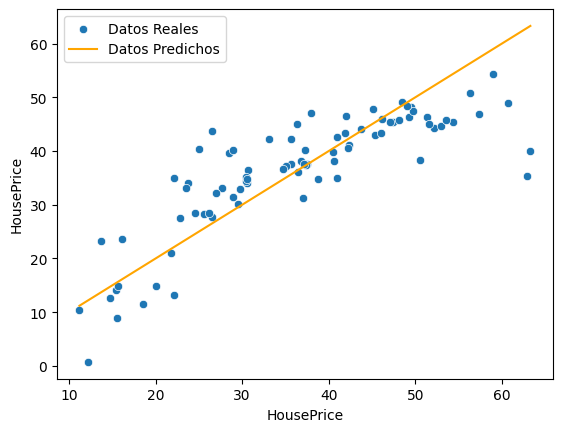

In [82]:
# Regresion Lineal Multiple
# Comparación de valores reales vs predichos
sns.scatterplot(x=y_test, y=y_pred, label='Datos Reales')
sns.lineplot(x=y_test, y=y_test, color='orange', label='Datos Predichos')
#plt.xlabel('Valores Reales')
#plt.ylabel('Predicciones')


Text(0, 0.5, 'Predicciones')

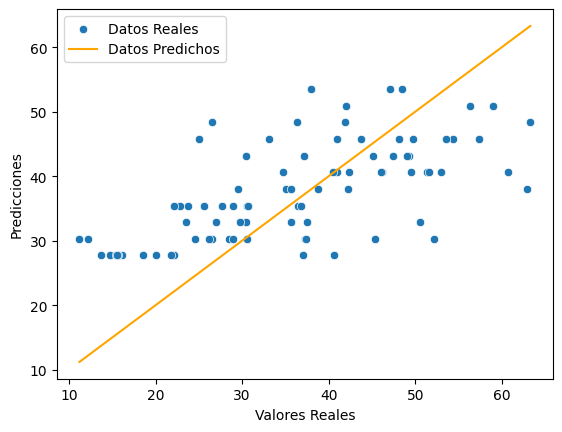

In [76]:
# Regresion Lineal Simple
sns.scatterplot(x=y_test_cs, y=y_pred_cs, label='Datos Reales')
sns.lineplot(x=y_test_cs, y=y_test_cs, color='orange', label='Datos Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

### ✅ Preguntas de Control

#### **¿Qué indican los signos y magnitudes de los coeficientes del dataset?**

Los coeficientes del modelo indican la relación entre cada variable independiente y el precio de la casa:

| Variable           | Coeficiente aproximado | Interpretación |
|--------------------|------------------------|----------------|
| `HouseAge`         | -0.270791              | Cada año adicional reduce ligeramente el precio (casas más viejas valen menos). |
| `DistanceToMRT`    | -0.004759              | A mayor distancia del MRT, menor precio (relación negativa significativa). |
| `ConvenienceStores`| +1.091425              | Cada tienda de conveniencia adicional incrementa el precio por unidad de área. |
| `Latitude`         | +229.043054            | Zonas más al norte tienden a ser más caras. |
| `Longitude`        | -29.492591             | Zonas más al este tienen precios ligeramente menores. |

 Los signos muestran si el impacto es positivo o negativo, y la magnitud refleja cuán fuerte es ese impacto en la predicción.

---

#### **¿Qué variable parece tener mayor impacto?**

- Por magnitud directa: `Latitude` tiene el mayor coeficiente numérico (+229), pero su variación es pequeña.
- Por correlación real con el precio:
  - `DistanceToMRT`: **correlación de -0.67** (la más fuerte del análisis).
  - `ConvenienceStores`: **correlación positiva de +0.57**.

Por tanto, la **distancia a la estación MRT** es la variable con mayor impacto negativo y predictivo sobre el precio.

---

#### **Crea un modelo con solo una variable. Compara su rendimiento con el modelo múltiple.**

Se usa `ConvenienceStores` como variable comparativa:

- **Modelo simple con `ConvenienceStores`**:
  - R² ≈ 0.39 → Explica solo el **39%** de la variabilidad del precio.
  - MSE más alto que el modelo múltiple.

- **Modelo múltiple con 5 variables**:
  - R² ≈ 0.68 → Explica el **68%** de la variabilidad.
  - Mejor ajuste y predicciones más precisas.

---

### Conclusión

El modelo múltiple tiene **mejor rendimiento predictivo** que el modelo simple, porque considera más factores relevantes en la estimación del precio de los bienes raíces.
